The dataset used is the ubiquitous iris dataset( from the sklearn datasets ) to depict how the decision tree looks like.  
Two decision trees are created and the resulting visualization is compared.  
Resources:
    install graphviz on Windows using the following link :https://iotespresso.com/how-to-install-graphviz-on-windows/. Then pip install graphviz

In [77]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
import matplotlib.image as matimg
%matplotlib inline

In [78]:
iris_data=load_iris()
print('feature names : {}'.format(iris_data.feature_names))
print('target names :{}'.format(iris_data.target_names))

feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names :['setosa' 'versicolor' 'virginica']


In [80]:
X=iris_data.data[:,2:]
y=iris_data.target

In [81]:
tree_clf_d2=DecisionTreeClassifier(max_depth=2)
tree_clf_d2.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [82]:
tree_clf_d4=DecisionTreeClassifier(max_depth=4)
tree_clf_d4.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [83]:
with open("iris_treed2.dot","w") as f2:
    export_graphviz(tree_clf_d2,
               out_file=f2,
               feature_names=iris_data.feature_names[2:],
                class_names=iris_data.target_names,
                rounded=True,
                filled=True
               )

In [84]:
with open("iris_treed4.dot","w") as f4:
    export_graphviz(tree_clf_d4,
               out_file=f4,
               feature_names=iris_data.feature_names[2:],
                class_names=iris_data.target_names,
                rounded=True,
                filled=True
               )

In [85]:
imgd1=Source.from_file("iris_treed2.dot", format = "png")  
imgd2=Source.from_file("iris_treed4.dot", format = "png") 
print(imgd1.view(),imgd2.view())

iris_treed2.dot.png iris_treed4.dot.png


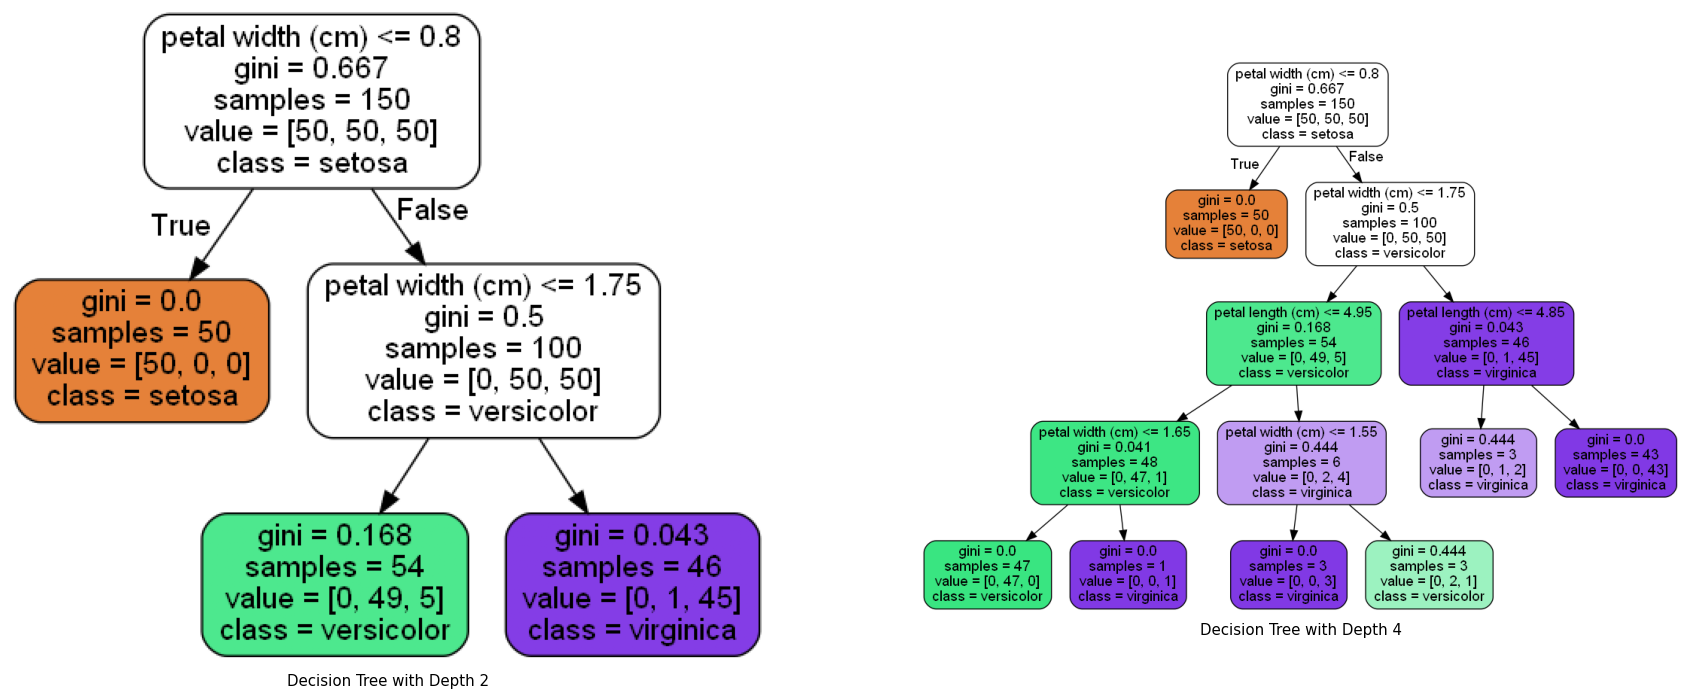

In [86]:
fig,ax=plt.subplots(1,2,figsize=(30,30))
img1=matimg.imread("iris_treed2.dot.png")
img2=matimg.imread("iris_treed4.dot.png")
ax[0].axis("off")
ax[1].axis("off")
ax[0].set_title("Decision Tree with Depth 2",fontsize=15,y=-0.04)
ax[1].set_title("Decision Tree with Depth 4",fontsize=15,y=-0.05)
ax[0].imshow(img1)
ax[1].imshow(img2);


#### Making a prediction using both the decision trees

In [93]:
print(tree_clf_d2.predict([[6,1.5]]))
print(tree_clf_d2.predict_proba([[6,1.5]])

[1]
[[0.         0.90740741 0.09259259]]


In [94]:
print(tree_clf_d4.predict([[6,1.5]]))
print(tree_clf_d4.predict_proba([[6,1.5]]))

[2]
[[0. 0. 1.]]
